# Linear LFM

Replication of the paper by [Lawrence et al., 2006.](https://papers.nips.cc/paper/3119-modelling-transcriptional-regulation-using-gaussian-processes.pdf)

The dataset required is small and is available preprocessed here:

- https://drive.google.com/drive/folders/1Tg_3SlKbdv0pDog6k2ys0J79e1-vgRyd?usp=sharing

### Probesets

The original paper restricted their interest to 5 known targets of p53:

| Target       | Probeset     | Aliases    |
| :------------- | :----------: | :----------- |
| DDB2 |  203409_at    | |
| p21   | 202284_s_at | p21CIP1, CDKN1A |
| SESN1/hPA26   | 218346_s_at |  |
| BIK   | 205780_at |  |
| TNFRSF10b   | 209294_x_at, 209295_at, 210405_x_at |  |

In [1]:
import torch

from lafomo.exact import AnalyticalLFM, Trainer
from lafomo.datasets import P53Data
from lafomo.plot import Plotter

In [2]:
dataset = P53Data(replicate=0, data_dir='../../../data/')
model = AnalyticalLFM(dataset, dataset.variance.reshape(-1))
optimizer = torch.optim.Adam(model.parameters(), lr=0.07)
trainer = Trainer(model, optimizer)
plotter = Plotter(model, dataset.gene_names)

In [3]:
trainer.train(epochs=300)

Iter 1/300 - Loss: 1.820   lengthscale: 1.414   noise: 0.693
Iter 11/300 - Loss: 1.717   lengthscale: 1.108   noise: 0.405
Iter 21/300 - Loss: 1.618   lengthscale: 0.872   noise: 0.229
Iter 31/300 - Loss: 1.511   lengthscale: 0.728   noise: 0.133
Iter 41/300 - Loss: 1.381   lengthscale: 0.659   noise: 0.082
Iter 51/300 - Loss: 1.208   lengthscale: 0.664   noise: 0.052
Iter 61/300 - Loss: 0.995   lengthscale: 0.716   noise: 0.032
Iter 71/300 - Loss: 0.753   lengthscale: 0.853   noise: 0.019
Iter 81/300 - Loss: 0.561   lengthscale: 1.249   noise: 0.011
Iter 91/300 - Loss: 0.446   lengthscale: 1.292   noise: 0.006
Iter 101/300 - Loss: 0.374   lengthscale: 1.066   noise: 0.003
Iter 111/300 - Loss: 0.332   lengthscale: 1.100   noise: 0.002
Iter 121/300 - Loss: 0.304   lengthscale: 1.174   noise: 0.002
Iter 131/300 - Loss: 0.286   lengthscale: 1.151   noise: 0.001
Iter 141/300 - Loss: 0.273   lengthscale: 1.142   noise: 0.001
Iter 151/300 - Loss: 0.264   lengthscale: 1.161   noise: 0.001
Ite

tensor([0.9757, 0.9522, 0.9138, 0.8563, 0.7774, 0.6782, 0.5639, 0.4431, 0.3264,
        0.2237, 0.1432, 0.0910, 0.0710, 0.0844, 0.1280, 0.1926, 0.2622, 0.3174,
        0.3409, 0.3241, 0.2709, 0.1977, 0.1276, 0.0836, 0.0803, 0.1194, 0.1892,
        0.2680, 0.3312, 0.3596, 0.3450, 0.2927, 0.2188, 0.1453, 0.0935, 0.0783,
        0.1039, 0.1628, 0.2375, 0.3054, 0.3458, 0.3463, 0.3070, 0.2400, 0.1654,
        0.1053, 0.0769, 0.0882, 0.1353, 0.2028, 0.2691, 0.3129, 0.3206, 0.2902,
        0.2318, 0.1629, 0.1027, 0.0676, 0.0668, 0.1005, 0.1592, 0.2257, 0.2800,
        0.3054, 0.2949, 0.2524, 0.1912, 0.1286, 0.0815, 0.0631, 0.0819, 0.1409,
        0.2368, 0.3600, 0.4962, 0.6295, 0.7465, 0.8393, 0.9059, 0.9494],
       dtype=torch.float64, grad_fn=<ViewBackward>)


C:\Users\Jacob\Documents\proj\reggae\lafomo\plot\plotter.py:108: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


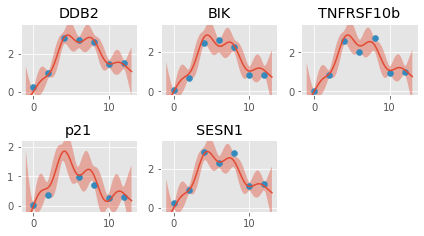

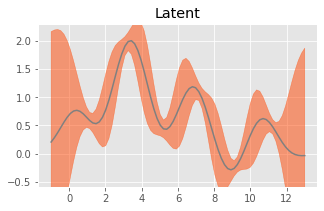

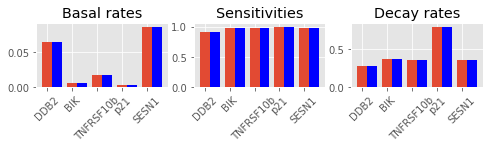

In [4]:
t_predict = torch.linspace(-1, 13, 80, dtype=torch.float64)

plotter.plot_outputs(t_predict, t_scatter=dataset.t_observed, y_scatter=dataset.m_observed)

plotter.plot_latents(t_predict, num_samples=0)

plotter.plot_kinetics()

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 3.2917e-01,  4.4645e-01,  5.7974e-01,  ...,  6.2185e-04,
          5.2752e-04,  4.2082e-04],
        [ 1.6365e-02,  2.0181e-02,  2.3058e-02,  ...,  1.5105e-03,
          1.2765e-03,  1.0159e-03],
        ...,
        [-3.1091e-03, -4.1315e-03, -5.2350e-03,  ...,  9.0475e-03,
          7.5965e-03,  6.0201e-03],
        [-3.9895e-03, -5.2407e-03, -6.5428e-03,  ...,  3.5540e-02,
          3.0837e-02,  2.4961e-02],
        [-2.0683e-03, -2.7239e-03, -3.4118e-03,  ..., -4.9839e-02,
         -4.5674e-02, -3.8422e-02]], dtype=torch.float64,
       grad_fn=<CholeskySolveBackward>)
tensor(0.9379, dtype=torch.float64, grad_fn=<MaxBackward1>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MinBackward1>)
tensor([[ 2.5321e-02,  3.5145e-02,  4.6914e-02,  ..., -3.7320e-05,
         -3.1316e-05, -2.4777e-05],
        [ 3.5145e-02,  4.8814e-02,  6.5215e-02,  ..., -4.9780e-05,
         -4.1678e

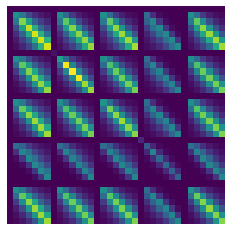

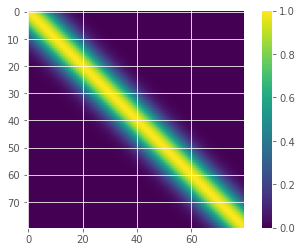

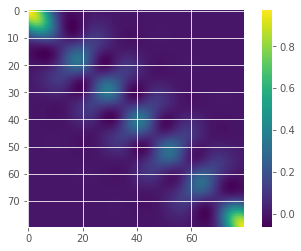

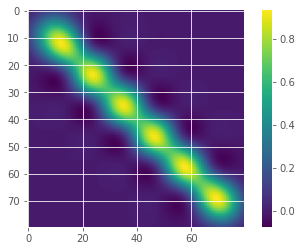

In [7]:
from matplotlib import pyplot as plt

Kxx = model.covar_module(model.train_t, model.train_t).evaluate()

plt.figure()
plt.imshow(Kxx.detach())
plt.axis('off')

Kxf = model.covar_module.K_xf(model.train_t, t_predict).type(torch.float64)

Kfx = torch.transpose(Kxf, 0, 1)
L = torch.cholesky(Kxx)

KxxKxf = torch.cholesky_solve(Kxf, L, upper=False)

# K_inv = torch.inverse(Kxx)

print(KxxKxf)
# KfxKxx = torch.matmul(torch.transpose(Kxf, 0, 1), K_inv)
# print(KfxKxx)
# mu = torch.matmul(KfxKxx, model.train_y).view(-1)
# plt.figure()
# plt.plot(mu.detach())

Kff = model.covar_module.K_ff(t_predict, t_predict)  # (100, 500)
plt.figure()
plt.imshow(Kff.detach())
plt.colorbar()
var = Kff - torch.matmul(Kfx, KxxKxf)
print(torch.diagonal(torch.matmul(Kfx, KxxKxf)).max())
print(torch.diagonal(var).min())
plt.figure()
plt.imshow(var.detach())
plt.colorbar()

plt.figure()
kfxf = torch.matmul(Kfx, KxxKxf)
print(kfxf)
plt.imshow(kfxf.detach())
plt.colorbar()


